## Exercise 1

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
sns.set(palette = 'pastel', rc = {"figure.figsize": (12,8), "axes.titlesize" : 18, "axes.labelsize" : 16, 
            "xtick.labelsize" : 16, "ytick.labelsize" : 16 })

In [50]:
df = pd.read_csv('heart.csv')

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date.

In [51]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age - age

sex - sex (1 - male, 0 - female)

cp - chest pain type 
- 0: typical angina
- 1: atypical angina
- 2: non-anginal pain
- 3: asymptomatic

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg - resting electrocardiographic results 
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest (in mm?)

slope -  the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - diagnosis of heart disease (angiographic disease status)
- Value 0: < 50% diameter narrowing
- Value 1: > 50% diameter narrowing


14 columns, no missing values (all have count of 303)

In [52]:
df.rename(index = str, columns = {
    'cp' : 'chest_pain',
    'trestbps' : 'rest_bp', 
    'fbs' : 'fast_bld_sugar', 
    'restecg' : 'rest_ecg', 
    'thalach' : 'max_hr', 
    'exang' : 'ex_angina', 
    'oldpeak' : 'st_depr', 
    'ca' : 'colored_vessels',
    'thal' : 'thalassemia', 
}, inplace = True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 302
Data columns (total 14 columns):
age                303 non-null int64
sex                303 non-null int64
chest_pain         303 non-null int64
rest_bp            303 non-null int64
chol               303 non-null int64
fast_bld_sugar     303 non-null int64
rest_ecg           303 non-null int64
max_hr             303 non-null int64
ex_angina          303 non-null int64
st_depr            303 non-null float64
slope              303 non-null int64
colored_vessels    303 non-null int64
thalassemia        303 non-null int64
target             303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.5+ KB


no categorical data, all numeric 

## Exercise 2

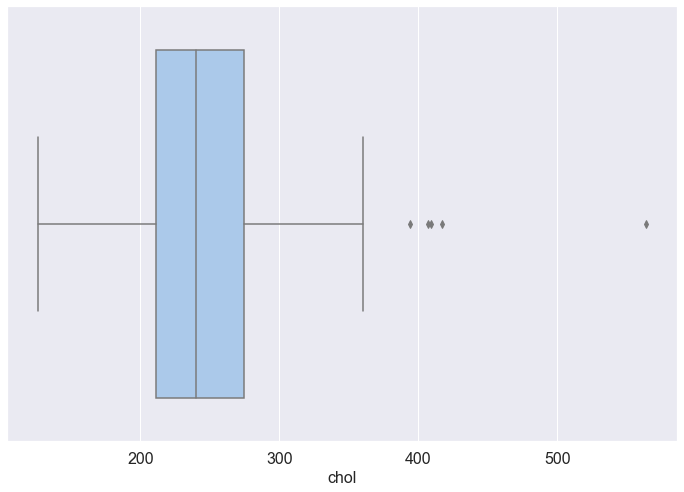

In [54]:
chol = sns.boxplot(df['chol'])

## Activity 1

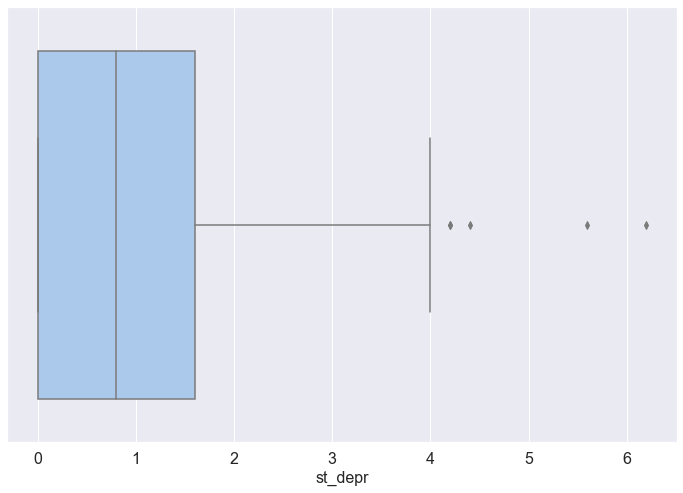

In [55]:
sd = sns.boxplot(df['st_depr'])

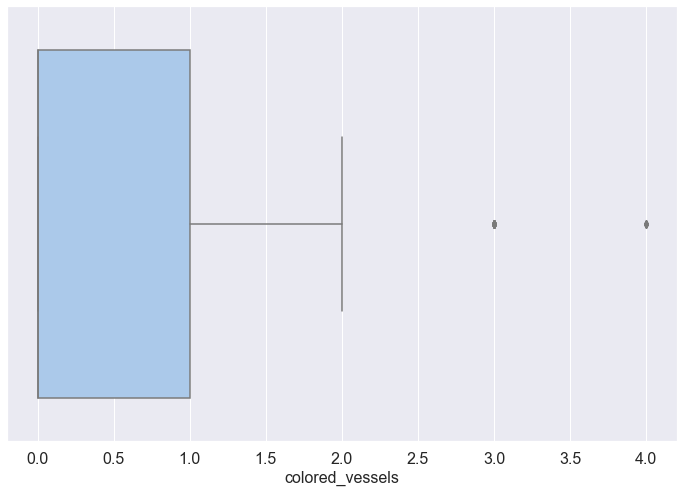

In [56]:
cv = sns.boxplot(df['colored_vessels'])

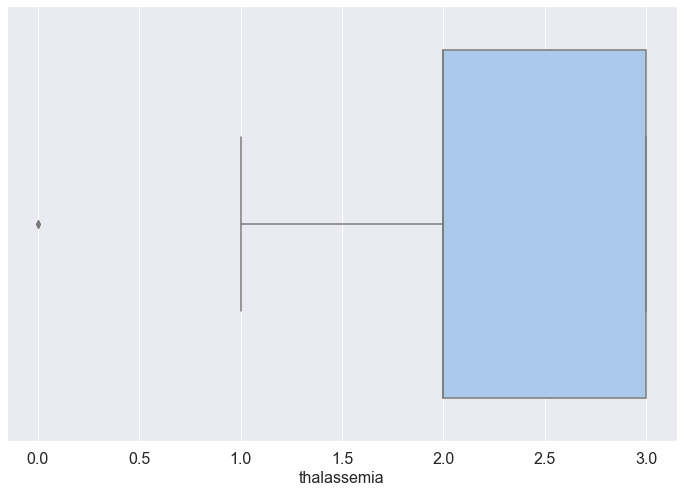

In [57]:
t = sns.boxplot(df['thalassemia'])

## Exercise 3

Text(0.5, 0, 'Age')

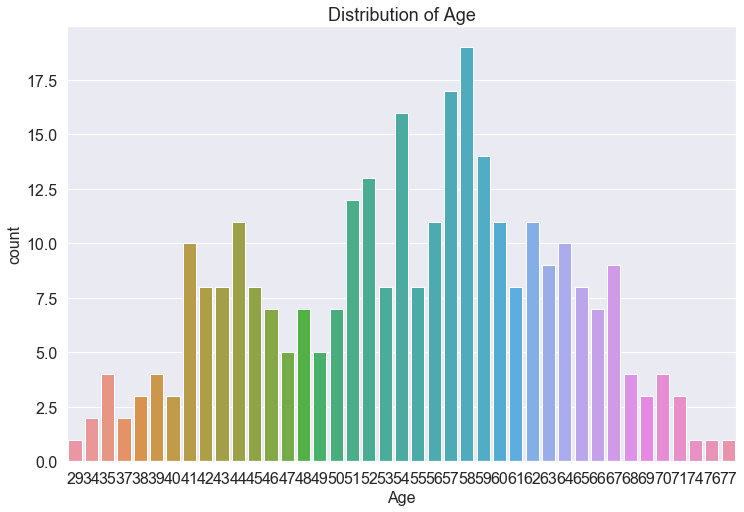

In [58]:
g = sns.countplot(x = 'age', data = df)
g.set_title('Distribution of Age')
plt.xlabel('Age')

In [59]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 0, 'Presence of Heart Disease')

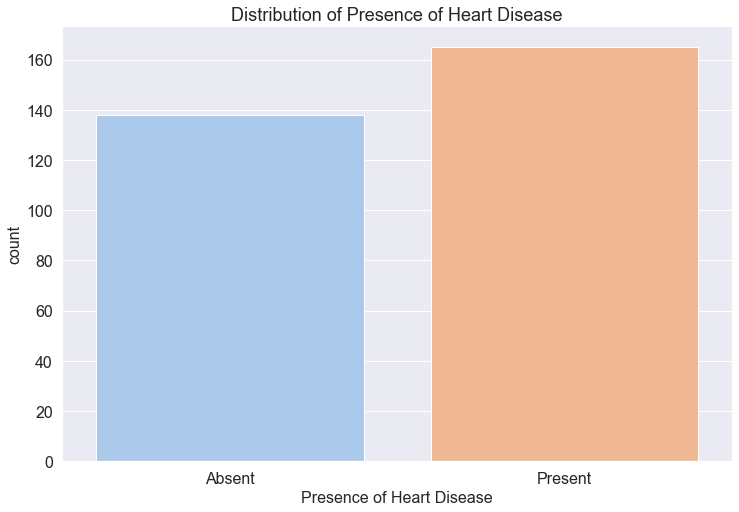

In [60]:
a = sns.countplot(x = 'target', data = df)
a.set_title('Distribution of Presence of Heart Disease')
a.set_xticklabels(['Absent', 'Present'])
plt.xlabel("Presence of Heart Disease")

In [61]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Text(0.5, 0, '')

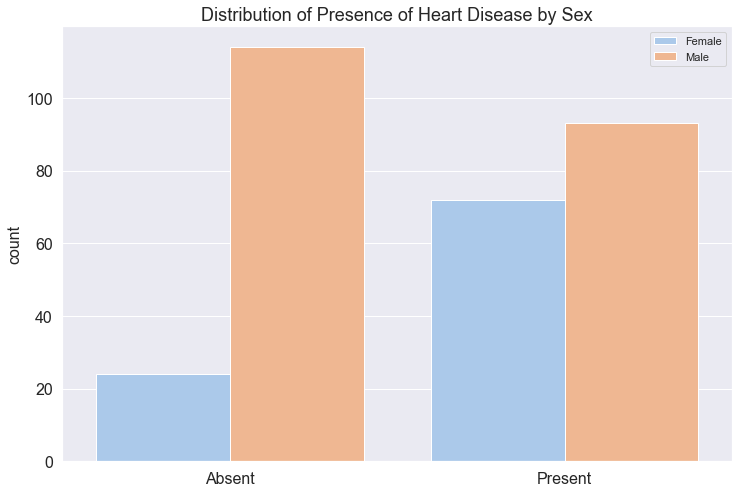

In [62]:
b = sns.countplot(x = 'target', data = df, hue = 'sex')
plt.legend(['Female', 'Male'])
b.set_title('Distribution of Presence of Heart Disease by Sex')
b.set_xticklabels(['Absent', 'Present'])
plt.xlabel("")

## Activity 2

In [63]:
df.chest_pain.value_counts()

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64

Text(0.5, 0, '')

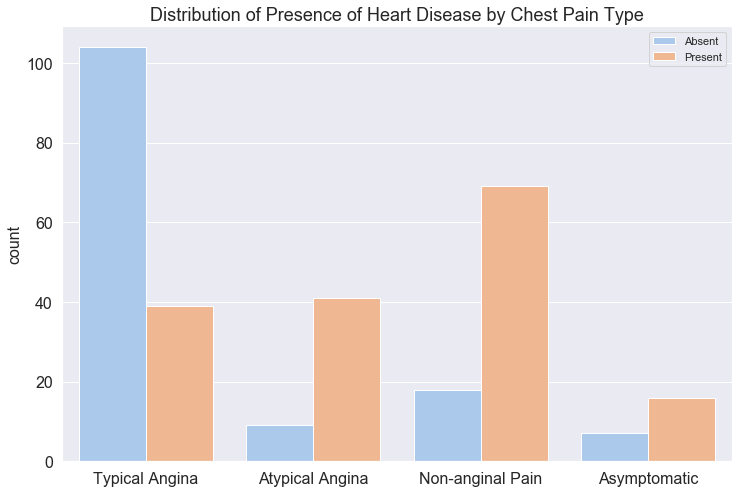

In [64]:
c = sns.countplot(x = 'chest_pain', data = df, hue = 'target')
plt.legend(['Absent', 'Present'])
c.set_title('Distribution of Presence of Heart Disease by Chest Pain Type')
c.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.xlabel("")

In [65]:
df.colored_vessels.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: colored_vessels, dtype: int64

Text(0.5, 0, '')

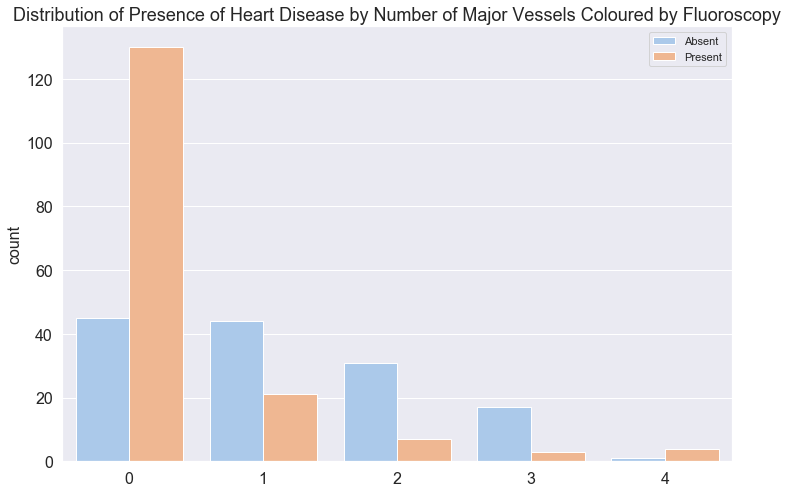

In [66]:
d = sns.countplot(x = 'colored_vessels', data = df, hue = 'target')
plt.legend(['Absent', 'Present'])
d.set_title('Distribution of Presence of Heart Disease by Number of Major Vessels Coloured by Fluoroscopy')
#d.set_xticklabels(df.colored_vessels.unique)
#d.set_xticklabels(['0', '1', '2', '3', '4'])
plt.xlabel("")

In [67]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

Text(0.5, 0, '')

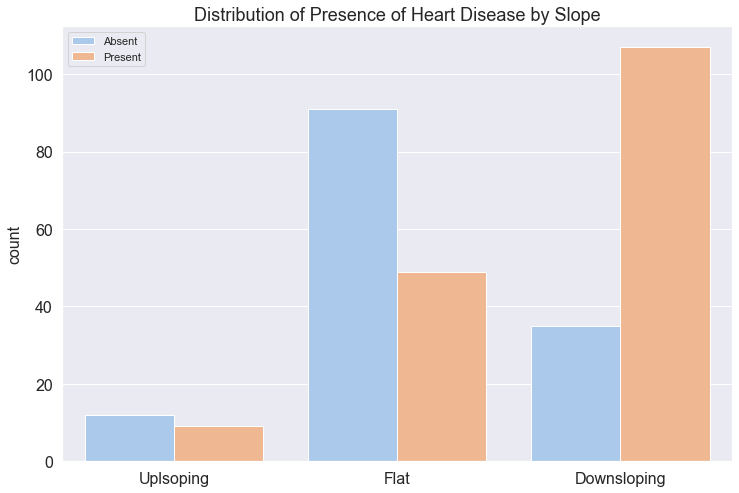

In [68]:
f = sns.countplot(x = 'slope', data = df, hue = 'target')
plt.legend(['Absent', 'Present'])
f.set_title('Distribution of Presence of Heart Disease by Slope')
#d.set_xticklabels(df.colored_vessels.unique)
f.set_xticklabels(['Uplsoping', 'Flat', 'Downsloping'])
plt.xlabel("")

## Exercise 4

In [69]:
sns.set(style = 'whitegrid', palette = 'colorblind', rc = {"figure.figsize": (12,8), "axes.titlesize" : 18, "axes.labelsize" : 16, 
            "xtick.labelsize" : 16, "ytick.labelsize" : 16 })

Text(0, 0.5, 'Maximum Heart Rate')

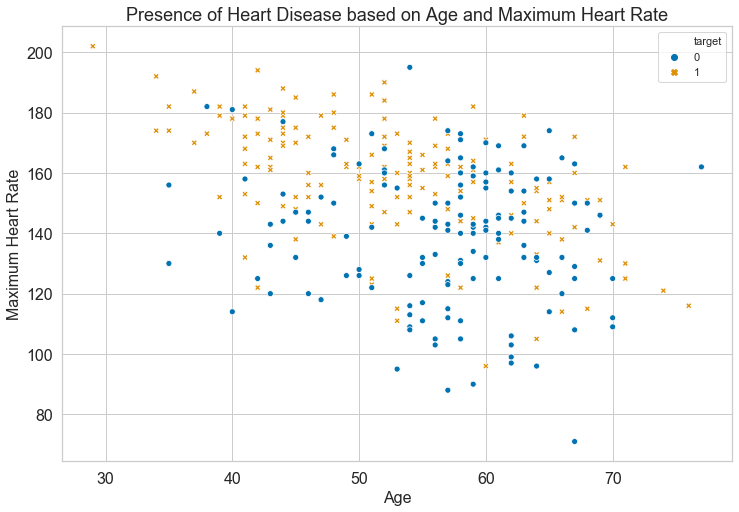

In [70]:
f = sns.scatterplot(x = 'age', y = 'max_hr', hue = 'target', style = 'target', data = df)
f.set_title('Presence of Heart Disease based on Age and Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

In [71]:
df['age_category'] = pd.cut(df.age, bins = list(np.arange(25, 85, 5)))

Text(0, 0.5, 'Count')

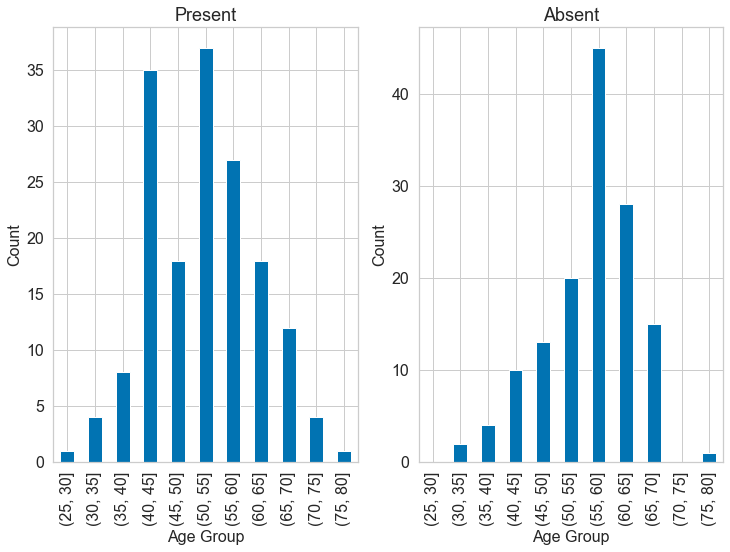

In [72]:
plt.subplot(121)
df[df.target == 1].groupby('age_category')['age'].count().plot(kind = 'bar')
plt.title('Present')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.subplot(122)
df[df.target == 0].groupby('age_category')['age'].count().plot(kind = 'bar')
plt.title('Absent')
plt.xlabel('Age Group')
plt.ylabel('Count')

## Activity 3

Text(0, 0.5, 'Cholesterol')

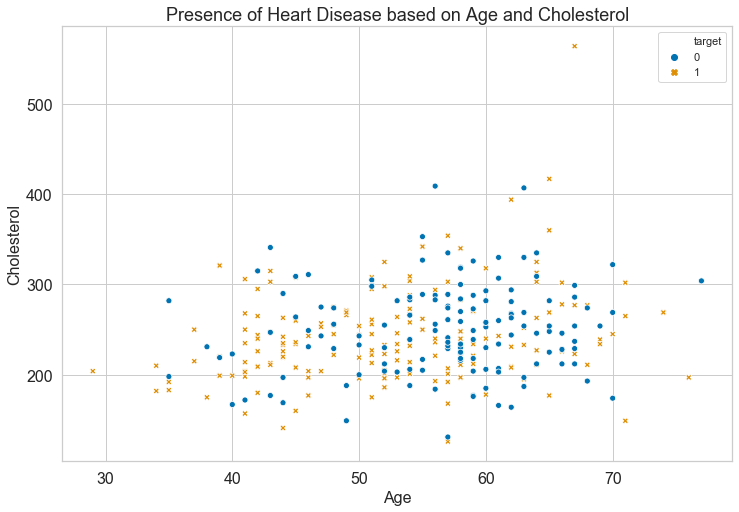

In [73]:
g= sns.scatterplot(x = 'age', y = 'chol', hue = 'target', style = 'target', data = df)
#plt.legend(['Absent', 'Present'])
g.set_title('Presence of Heart Disease based on Age and Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

In [74]:
df['chol_cat'] = pd.cut(df.chol, bins = list(np.arange(120, 380, 20)))

Text(0, 0.5, 'Count')

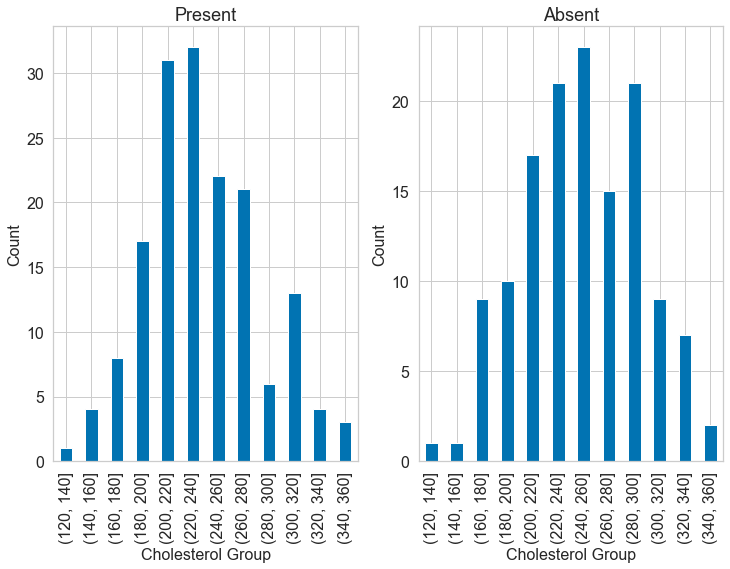

In [75]:
plt.subplot(121)
df[df.target == 1].groupby('chol_cat')['chol'].count().plot(kind = 'bar')
plt.title('Present')
plt.xlabel('Cholesterol Group')
plt.ylabel('Count')

plt.subplot(122)
df[df.target == 0].groupby('chol_cat')['chol'].count().plot(kind = 'bar')
plt.title('Absent')
plt.xlabel('Cholesterol Group')
plt.ylabel('Count')

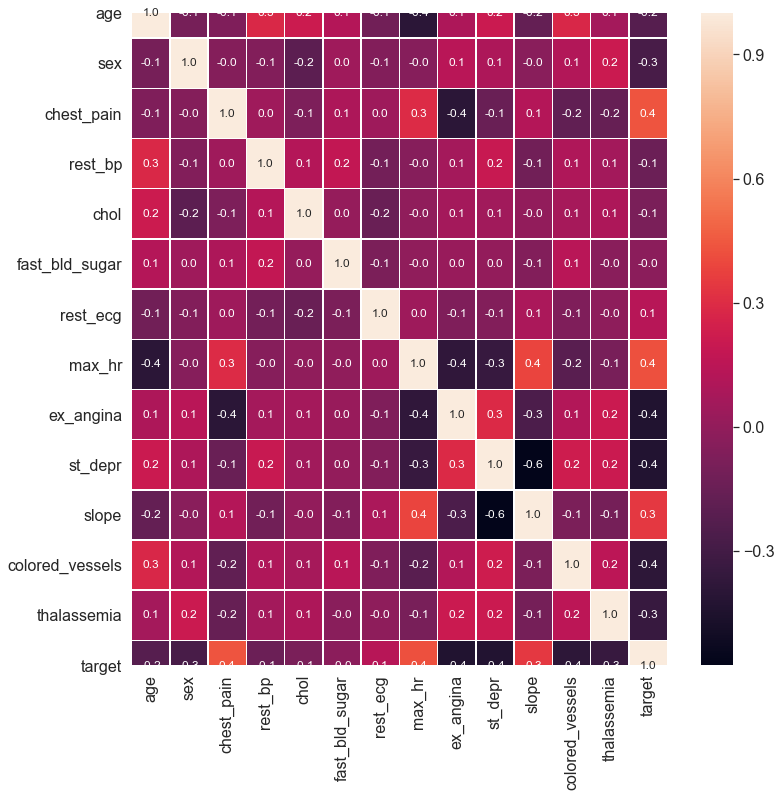

In [79]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()